<a href="https://colab.research.google.com/github/TaegeunSONG/knu/blob/main/RNN_SNU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generateX(data, n):
# generate train_data
# ex: given data = [1,2,3,4,5,6,7,8,9,10] 
# generateX(data, 5) gives
#
#  x (# of n)            y
# ---------              -
# 1,2,3,4,5              6
# 2,3,4,5,6              7
# 3,4,5,6,7              8
# ... 
    x_train = []
    y_train = []
    for i in range(len(data)):
        x = data[i:(i + n)]
        if (i + n) < len(data):
             x_train.append(x)
             y_train.append(data[i + n])
        else:
             break
    return np.array(x_train), np.array(y_train)


# Sin with noise 100 sets
data = np.sin(2 * np.pi * 0.04 * np.arange(0, 100)) + 0.5 * np.random.random(100)
x, y = generateX(data, 10)




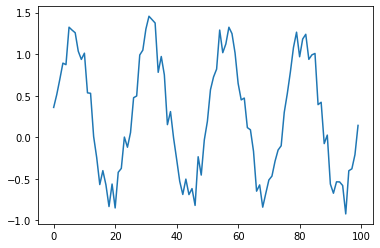

In [ ]:
plt.plot(data)

In [ ]:
x = x.reshape(-1,10,1)
y = y.reshape(-1,1)

# train, test seperation
x_train = x[:70, :, :]
y_train = y[:70:, :]
x_test = x[70:, :, :]
y_test = y[70:, :]

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Input, Dense, SimpleRNN, LSTM, Bidirectional

model = Sequential()

model.add( Input(shape=(10,1)))


# model.add( SimpleRNN(1))

model.add( SimpleRNN(10))

# model.add( LSTM(10) )

# model.add( LSTM(1, return_sequences = True) )
# model.add( Bidirectional(LSTM(1)) )

# model.add( LSTM(10, return_sequences = True) )
# model.add( Bidirectional(LSTM(10)) )

model.add( Dense(1) )

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam')



In [ ]:
history = model.fit(x_train, y_train, epochs=500, batch_size=100,verbose=1)

# Predict values
y_hat = model.predict(x_test, batch_size=1)

Epoch 1/500
1/1 [==============================] - 1s 796ms/step - loss: 0.4267
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 0.4139
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 0.4014
Epoch 4/500
1/1 [==============================] - 0s 14ms/step - loss: 0.3892
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 0.3773
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 0.3658
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 0.3545
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 0.3435
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 0.3328
Epoch 10/500
1/1 [==============================] - 0s 13ms/step - loss: 0.3225
Epoch 11/500
1/1 [==============================] - 0s 12ms/step - loss: 0.3124
Epoch 12/500
1/1 [==============================] - 0s 11ms/step - loss: 0.3027
Epoch 13/500
1/1 [==============================

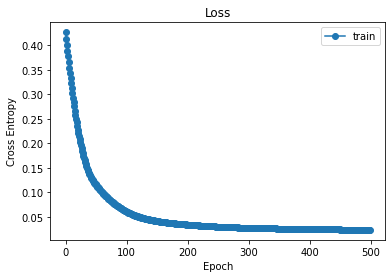

In [ ]:

plt.plot(history.history['loss'], 'o-', label='train')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.title('Loss')
# plt.yscale('log')
plt.legend()

plt.show()

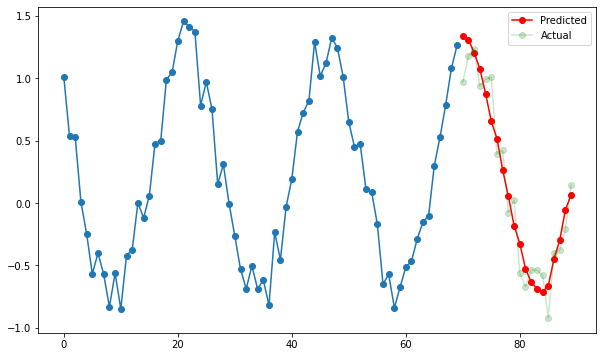

In [ ]:
# prediction
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(y_hat))
plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(70,), 'o-')
plt.plot(b_axis, y_hat.reshape(20,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(20,), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()

In [ ]:
# https://github.com/whwang299/python-AI-lib/blob/main/20210818_ai_lib_tutorial_full.ipynb

!git clone https://github.com/KLUE-benchmark/KLUE.git
!pip install transformers
!pip install legacy


Cloning into 'KLUE'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 157 (delta 18), reused 9 (delta 9), pack-reused 133
Receiving objects: 100% (157/157), 49.11 MiB | 16.15 MiB/s, done.
Resolving deltas: 100% (43/43), done.
Checking out files: 100% (29/29), done.


In [ ]:

from transformers import PreTrainedTokenizerFast, GPT2LMHeadModel
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline
import json
import legacy
import torch

# %cd content

path_train_data = './KLUE/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json'
path_dev_data = './KLUE/klue_benchmark/ynat-v1.1/ynat-v1.1_dev.json'

## 
with open(path_train_data, 'r') as f:
    data_t = json.load(f)
with open(path_dev_data, 'r') as f:
    data_d = json.load(f)

##
print(len(data_t), len(data_d))

##
data_t[0]

##
texts_t = [x["title"] for x in data_t]
labels_t = [x["label"] for x in data_t]
texts_d = [x["title"] for x in data_d]
labels_d = [x["label"] for x in data_d]

45678 9107


In [ ]:
# character -> integer -> vector

label_types = list(set(labels_t))
n_labels = len(label_types)

## 
vocab = []
for text in texts_t:
    for char in text:
        if char not in vocab:
            vocab.append(char)

for text in texts_d:
    for char in text:
        if char not in vocab:
            vocab.append(char)

##
n_vocab = len(vocab)
n_vocab
vocab_dict = {char: i for i, char in enumerate(vocab)}
label_dict = {label: i for i, label in enumerate(label_types)}

##
vocab_emb = torch.nn.Embedding(n_vocab, 50)
layer1 = torch.nn.Linear(50, n_labels)

##
text = texts_t[0]
label = labels_t[0]

##
text_ids = [[vocab_dict[char] for char in text]]
label_id = [label_dict[label]]

##
text_ids_tensor = torch.tensor(text_ids)
label_id_tensor = torch.tensor(label_id)

##
text_tensor = vocab_emb(text_ids_tensor)

##
text_tensor_sum = text_tensor.sum(dim=1)
out = layer1(text_tensor_sum)

##
loss = torch.nn.CrossEntropyLoss()(out, label_id_tensor)

##
pr_label = label_types[out.argmax()]

In [ ]:
list_of_param = list(vocab_emb.parameters()) + list(layer1.parameters())
optim = torch.optim.Adam(list_of_param, lr=0.001)

##
for epoch in range(30):
    cnt = 0
    correct = 0
    for step, (text, label) in enumerate(zip(texts_t[:1000], labels_t[:1000])):
        
        text_ids = [[vocab_dict[char] for char in text]]
        label_id = [label_dict[label]]

        text_ids_tensor = torch.tensor(text_ids)
        label_id_tensor = torch.tensor(label_id)

        text_tensor = vocab_emb(text_ids_tensor)
        text_tensor_sum = text_tensor.sum(dim=1)
        out = layer1(text_tensor_sum)

        loss = torch.nn.CrossEntropyLoss()(out, label_id_tensor)
        optim.zero_grad()
        loss.backward()
        optim.step()
        
        pr_label = label_types[out.argmax()]
        if pr_label == label:
            correct += 1
        cnt += 1
    if epoch % 5 == 0:
        print(f"Accuracy: {correct/cnt}")
        print(f"epoch: {epoch}, loss: {loss.item()}")
        print(f"text: {text}, label: {label}, prediction: {pr_label}")

Accuracy: 0.999
epoch: 0, loss: 0.0
text: 유혹의 색 라즈베리 로즈 입은 LG V30, label: IT과학, prediction: IT과학
Accuracy: 1.0
epoch: 5, loss: 0.0
text: 유혹의 색 라즈베리 로즈 입은 LG V30, label: IT과학, prediction: IT과학
Accuracy: 1.0
epoch: 10, loss: 0.0
text: 유혹의 색 라즈베리 로즈 입은 LG V30, label: IT과학, prediction: IT과학
Accuracy: 1.0
epoch: 15, loss: 0.0
text: 유혹의 색 라즈베리 로즈 입은 LG V30, label: IT과학, prediction: IT과학
Accuracy: 1.0
epoch: 20, loss: 0.0
text: 유혹의 색 라즈베리 로즈 입은 LG V30, label: IT과학, prediction: IT과학
Accuracy: 1.0
epoch: 25, loss: 0.0
text: 유혹의 색 라즈베리 로즈 입은 LG V30, label: IT과학, prediction: IT과학


In [ ]:
text = "오늘은 미세먼지가 심하겠습니다."
# text = "새로운 정부는 내년에 잘 할꺼야"
# text = "서울대학교 물리교육과에서 삼주 동안 즐거웠어요"

text_ids = [[vocab_dict[char] for char in text]]
text_ids_tensor = torch.tensor(text_ids)
text_tensor = vocab_emb(text_ids_tensor)
text_tensor_sum = text_tensor.sum(dim=1)
out = layer1(text_tensor_sum)

pr_label = label_types[out.argmax()]
pr_label

'IT과학'